
# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?


(1) 데이터 가져오기
터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
여기에서 데이터를 상세히 확인할 수 있습니다.

In [ ]:
import pandas as pd
train = pd.read_csv('train.csv')

(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
to_datetime 활용 : 링크 참조
pandas datetime extract year month day 키워드로 검색해 보기

In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

print(train.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0  
1       0       0  
2       0     

(3) year, month, day, hour, minute, second 데이터 개수 시각화하기
sns.countplot 활용해서 시각화하기
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기


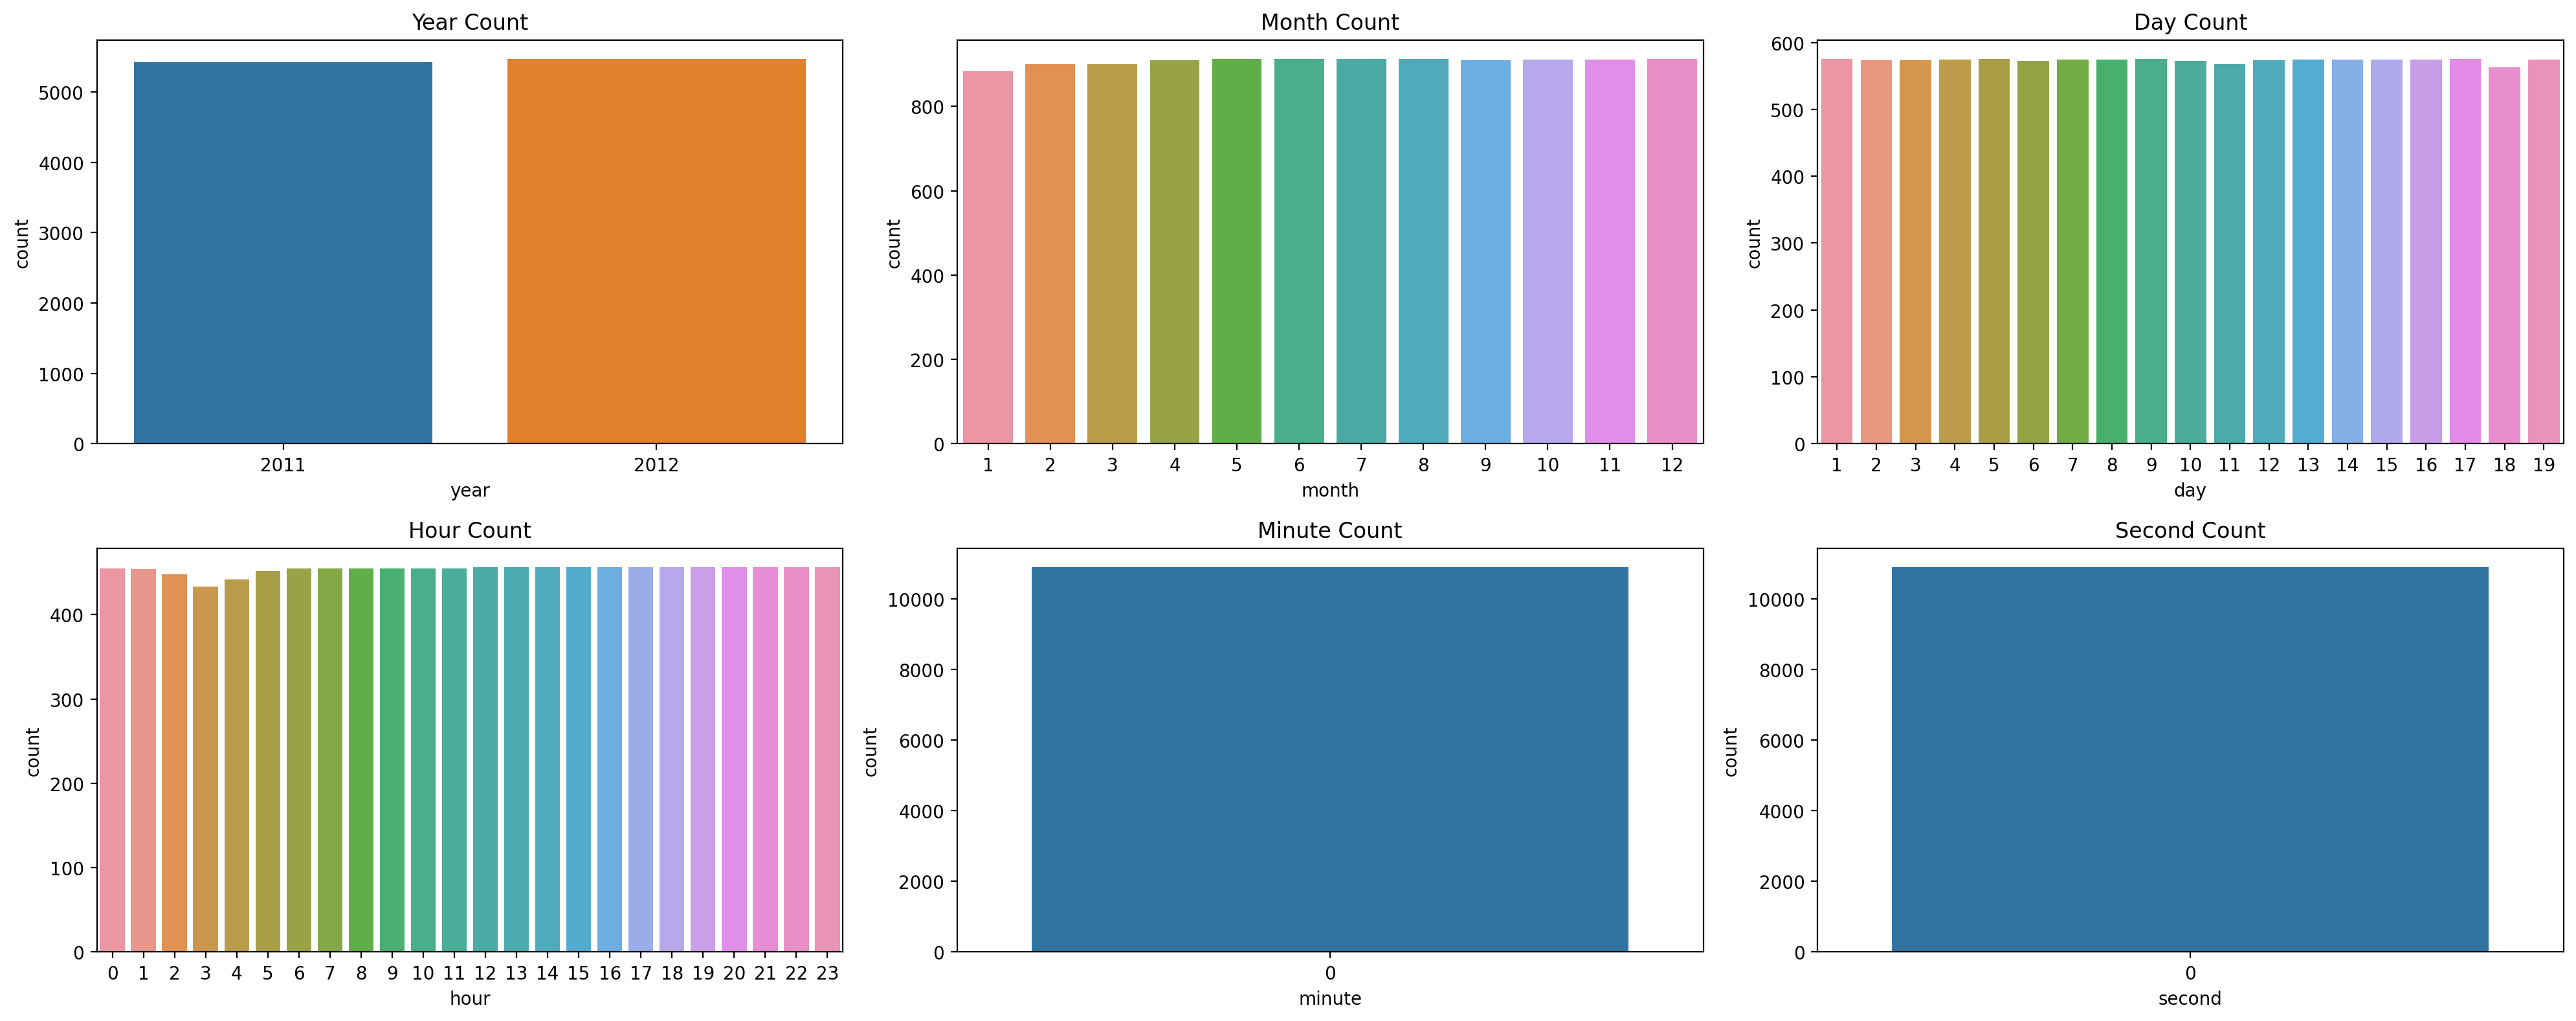

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(20, 8))

sns.countplot(x='year', data=train, ax=axes[0, 0])
axes[0, 0].set_title('Year Count')

sns.countplot(x='month', data=train, ax=axes[0, 1])
axes[0, 1].set_title('Month Count')

sns.countplot(x='day', data=train, ax=axes[0, 2])
axes[0, 2].set_title('Day Count')

sns.countplot(x='hour', data=train, ax=axes[1, 0])
axes[1, 0].set_title('Hour Count')

sns.countplot(x='minute', data=train, ax=axes[1, 1])
axes[1, 1].set_title('Minute Count')

sns.countplot(x='second', data=train, ax=axes[1, 2])
axes[1, 2].set_title('Second Count')

plt.tight_layout()
plt.show()

(4) X, y 컬럼 선택 및 train/test 데이터 분리
X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기


In [ ]:
from sklearn.model_selection import train_test_split

X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)


(5) LinearRegression 모델 학습
sklearn의 LinearRegression 모델 불러오기 및 학습하기


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
학습된 모델에 X_test를 입력해서 예측값 출력하기
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
mse 값과 함께 rmse 값도 계산하기


In [ ]:
import numpy as np
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'mse: {mse}, rmse: {rmse}')

mse: 25094.724003420277, rmse: 158.4131434048964


(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

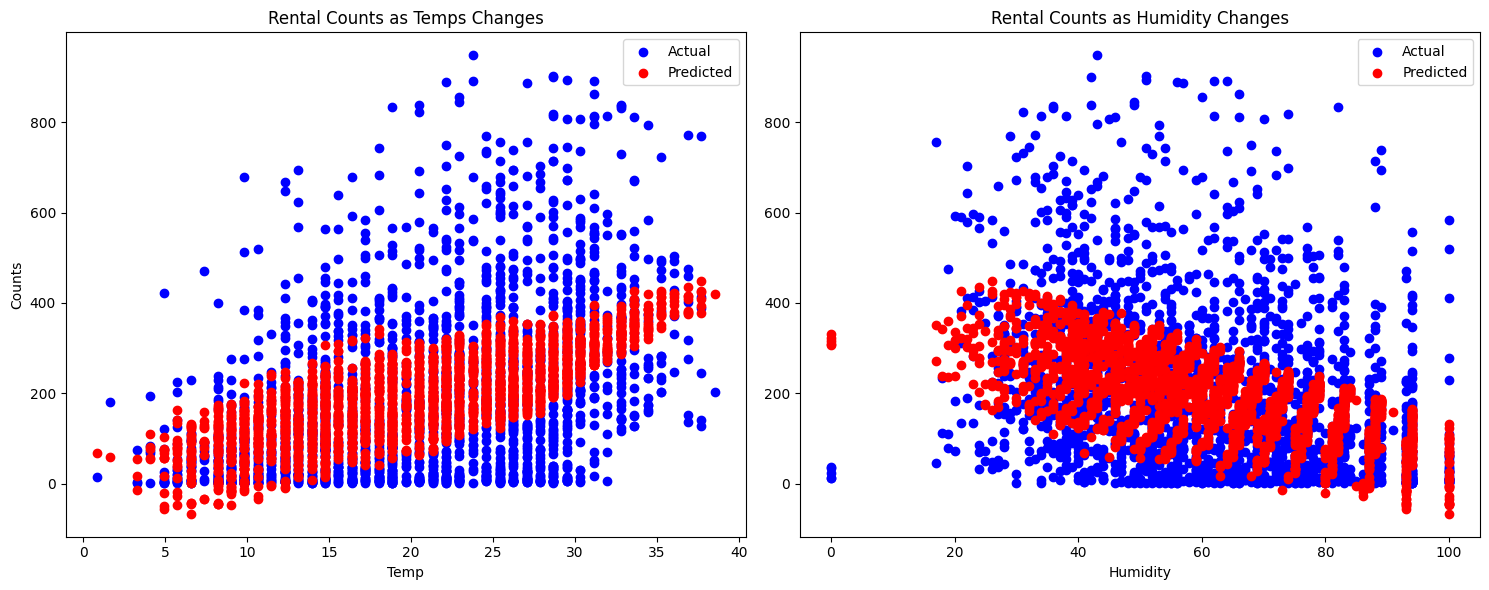

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# 서브플롯 1: temp vs count
ax1 = plt.subplot(1, 2, 1)
plt.scatter(X_test['temp'], y_test, color='blue', label='Actual')
plt.scatter(X_test['temp'], pred, color='red', label='Predicted')
plt.title('Rental Counts as Temps Changes')
plt.xlabel('Temp')
plt.ylabel('Counts')
plt.legend()

# 두 번째 서브플롯을 생성하면서 첫 번째 서브플롯의 y-축을 공유
plt.subplot(1, 2, 2, sharey=ax1)
plt.scatter(X_test['humidity'], y_test, color='blue', label='Actual')
plt.scatter(X_test['humidity'], pred, color='red', label='Predicted')
plt.title('Rental Counts as Humidity Changes')
plt.xlabel('Humidity')
plt.legend()

plt.tight_layout()
plt.show()
